In [1]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [2]:
#pip install scikit-learn

In [3]:
data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [4]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [5]:
data_train

,Unnamed: 0,period,closer#,category,label,Silhouette,C1,C2,C3,C4,...,C92,C93,C94,C95,C96,C97,C98,C99,C100,result
0,0,202011,2,3.0,1.0,0.126229,-0.001495,0.003309,0.006705,0.003787,...,-0.003025,0.002794,-0.000103,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,-0.003641,1
1,1,202011,2,3.0,12.0,0.126229,-0.021860,-0.026092,0.073803,-0.043048,...,-0.018356,0.030260,-0.009593,-0.085919,-0.086635,-0.032728,0.003305,0.029844,-0.030539,1
2,2,202011,2,3.0,13.0,0.126229,-0.006153,-0.002951,0.007688,-0.006929,...,-0.002736,0.001071,-0.000826,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,-0.000431,1
3,3,202011,2,3.0,12.0,0.126229,-0.011715,-0.012549,0.026318,-0.014970,...,-0.010255,0.013182,-0.005682,-0.035902,-0.030800,-0.010657,0.002631,0.007532,-0.014666,1
4,4,202011,2,3.0,12.0,0.126229,-0.004312,-0.008192,0.024495,-0.017751,...,-0.000795,0.011308,-0.005071,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,-0.009291,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,112261,201924,2,1.0,5.0,0.746625,0.002639,-0.017651,0.005692,0.013071,...,-0.018755,-0.004214,-0.011068,0.005706,0.015451,0.006023,0.001769,0.004318,0.015926,2
112262,112262,201924,2,1.0,5.0,0.746625,-0.000535,-0.016673,0.003547,0.007739,...,-0.030073,0.001249,-0.008988,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.016009,2
112263,112263,201924,2,1.0,5.0,0.746625,0.004187,-0.007702,-0.000028,0.002341,...,-0.001273,0.000613,-0.004343,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.007715,2
112264,112264,201924,2,1.0,5.0,0.746625,-0.002951,-0.012826,-0.000484,0.004241,...,-0.015236,0.000469,-0.011737,0.003951,0.013484,0.002950,0.001749,0.001292,0.012489,2


In [6]:
x_data_df = data_train[data_train.columns.difference(['result'])]

In [8]:
x_data_df = data_train[data_train.columns.difference(['label','result'])]

In [9]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_data_df = data_train['label']

In [10]:
x_data_df = x_data_df.drop('Unnamed: 0', axis=1)

In [11]:
#x_data_df['raw_data'] = x_data_df['raw_data'].apply(lambda x: x[1:len(x)-1].split(','))
print(len(x_data_df)) 

187533


In [12]:
X_train,X_test, y_train, y_test = train_test_split(x_data_df,y_data_df,test_size=0.2,random_state=11)

In [13]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [14]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [15]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [16]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.9494494361052603
Random Forest Precision :   0.9497924998185214
Random Forest Recall :   0.9494494361052603
Random Forest f1 :   0.9482553598673159


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [17]:
y_score

array([[0.74, 0.01, 0.  , ..., 0.03, 0.  , 0.15],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.96, 0.  , ..., 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ]])

In [18]:
#conda update sklearn

In [19]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



251        1.0
21274      5.0
2408       1.0
42364      5.0
10786     13.0
          ... 
62404      6.0
94958      5.0
101547     2.0
64945      6.0
16938      5.0
Name: label, Length: 37507, dtype: float64
[[1 0 0]
 [0 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 0]
 [0 0 0]]
class :  0 == 0.9996277795314181
class :  1 == 0.9982562178386419
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [20]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Found input variables with inconsistent numbers of samples: [112521, 450084]

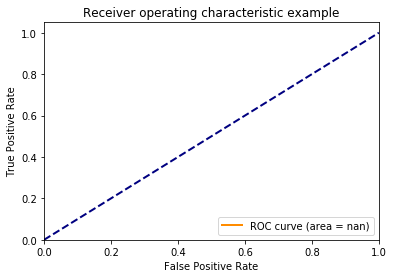

In [21]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [22]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

KeyError: 'micro'

<Figure size 432x288 with 0 Axes>

In [23]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [24]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.9249206814727917
Decision Tree Precision :   0.9247613044827593
Decision Tree Recall :   0.9249206814727917
Decision Tree f1 :   0.9248182373700018


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [25]:
gb_clf = GradientBoostingClassifier(random_state = 11) # gradient boost

In [26]:
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)

In [27]:
print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))

Gredient Boosting Accuracy :   0.9309195616818194
Gredient Boosting Precision :   0.9306668734989685
Gredient Boosting Recall :   0.9309195616818194
Gredient Boosting f1 :   0.9299295930796193


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [28]:
lr_clf = LogisticRegression(random_state = 11)

In [29]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [30]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.34089636601167783
Logistic Regression  Precision :   0.1162103323599678
Logistic Regression  Recall :   0.34089636601167783
Logistic Regression  f1 :   0.17333231009585082


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
y_score = lr_clf.predict_proba(X_test)

In [32]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

251        1.0
21274      5.0
2408       1.0
42364      5.0
10786     13.0
          ... 
62404      6.0
94958      5.0
101547     2.0
64945      6.0
16938      5.0
Name: label, Length: 37507, dtype: float64
[[1 0 0]
 [0 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 0]
 [0 0 0]]
class :  0 == 0.33201152347758145
class :  1 == 0.2851566595074185
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [33]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

ValueError: Found input variables with inconsistent numbers of samples: [112521, 450084]

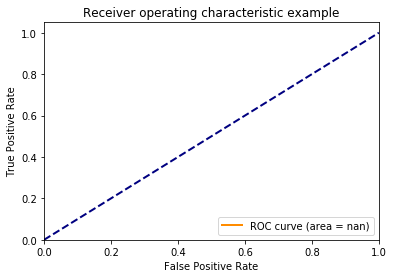

In [34]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [35]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

KeyError: 'micro'

<Figure size 432x288 with 0 Axes>

In [36]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [37]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C94,C95,C96,C97,C98,C99,Silhouette,category,closer#,period
3819,-0.001065,-0.001344,0.001918,0.000592,-0.004610,-0.002905,-0.000087,-0.003956,-0.003297,-0.005316,...,0.000304,0.004083,0.001433,-0.000216,0.001440,-0.003674,0.696935,2.0,2,202011
40667,0.004591,0.000229,-0.002036,-0.002419,0.001004,0.003154,0.001899,-0.003817,0.000912,-0.000545,...,-0.001680,0.000687,0.000774,0.004442,-0.000648,-0.002980,0.009741,2.0,2,201923
994,-0.003196,0.004062,-0.002566,-0.004181,0.002056,-0.002748,0.003787,0.002265,-0.002280,0.001659,...,-0.000773,0.000141,0.000338,-0.002144,0.001788,-0.000269,0.126229,3.0,2,202011
81522,-0.007798,-0.029958,-0.003762,0.019341,-0.009424,-0.000633,0.020104,0.008388,-0.013617,-0.020365,...,0.038638,-0.004999,-0.011506,0.024091,-0.015833,0.001982,0.737198,1.0,2,201912
80624,-0.085756,-0.228203,-0.043884,0.212829,-0.071506,0.035740,0.193018,0.062508,-0.138530,-0.174180,...,0.325285,-0.026984,-0.101138,0.222024,-0.117305,0.040608,0.737198,1.0,2,201912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27060,-0.009905,-0.019656,-0.013295,0.009479,0.003376,0.013583,0.005138,-0.015896,0.001607,0.005390,...,-0.021843,-0.010030,-0.013547,-0.006398,-0.007302,0.007872,0.738239,1.0,2,201711
22350,-0.006707,-0.001204,0.004745,-0.001618,0.003204,0.002872,-0.007491,-0.003652,-0.009565,-0.002143,...,0.006907,0.002199,-0.000288,0.003603,0.003144,-0.005077,0.711584,1.0,2,202021
21584,-0.011310,-0.006785,-0.003580,0.005423,-0.005037,-0.003407,-0.001252,0.011018,-0.002606,-0.013081,...,0.002676,0.002442,0.002440,-0.004818,0.003340,-0.004840,0.726900,3.0,2,201911
6687,-0.002570,0.000177,0.004565,-0.000599,-0.005442,-0.001149,0.009258,-0.001158,-0.009031,-0.004377,...,0.010073,-0.003596,-0.002028,0.000881,-0.004645,-0.008040,0.369699,2.0,2,202021


In [46]:
model = Sequential()
model.add(Dense(120, input_dim=104, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [47]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [ ]:
y_cate_train = to_categorical(y_train , num_classes=13)
#y_cate_train = y_train

In [48]:
#y_cate_train = list(y_train)

In [49]:
y_cate_train = to_categorical(y_train , num_classes=13)
#y_cate_train = y_train

In [50]:
#y_cate_train = list(y_train)

In [51]:
#X_train

In [52]:
model.fit(X_train,y_cate_train, epochs=300, batch_size=200)

Epoch 1/300
150026/150026 [==============================] - 1s 9us/step - loss: 171.7391 - accuracy: 0.2232
Epoch 2/300
150026/150026 [==============================] - 1s 8us/step - loss: 14.3528 - accuracy: 0.1991
Epoch 3/300
150026/150026 [==============================] - 1s 8us/step - loss: 2.2180 - accuracy: 0.3370
Epoch 4/300
150026/150026 [==============================] - 1s 8us/step - loss: 2.0116 - accuracy: 0.3370
Epoch 5/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.9190 - accuracy: 0.3370
Epoch 6/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8870 - accuracy: 0.3370
Epoch 7/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8757 - accuracy: 0.3370
Epoch 8/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8702 - accuracy: 0.3370
Epoch 9/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8669 - accuracy: 0.3370
Epoch 10/300
150026/150026 [======

150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 77/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 78/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 79/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 80/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 81/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 82/300
150026/150026 [==============================] - 1s 9us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 83/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 84/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 85/300
150026/150026 [=============

150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 152/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 153/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 154/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 155/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 156/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 157/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 158/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 159/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 160/300
150026/150026 [====

150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 227/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 228/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 229/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 230/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 231/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 232/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 233/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 234/300
150026/150026 [==============================] - 1s 8us/step - loss: 1.8599 - accuracy: 0.3370
Epoch 235/300
150026/150026 [====

In [42]:
X_test

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
251,0.003609,0.005405,-0.003673,0.002230,-0.005533,0.002248,-0.002091,0.003875,-0.003366,0.006010,...,-0.005088,0.002435,-0.001425,0.001564,0.004732,0.126229,3.0,2,1.0,202011
21274,-0.004946,0.002248,-0.001245,0.004582,-0.005341,-0.001849,-0.001053,0.001715,-0.007273,-0.005314,...,0.004164,-0.001582,-0.000197,0.007651,-0.006374,0.711584,1.0,2,5.0,202021
2408,-0.004942,-0.000757,0.004087,0.002646,-0.002901,-0.001663,0.001977,0.003490,0.003709,-0.001759,...,-0.004506,-0.003069,-0.002461,0.003005,-0.001954,0.126229,3.0,2,1.0,202011
42364,-0.114611,-0.014224,-0.048490,-0.154150,0.022153,0.013070,-0.049324,-0.069129,-0.090181,-0.037355,...,-0.058670,-0.024119,-0.034482,0.006286,-0.063955,0.743554,1.0,2,5.0,201821
10786,0.000631,0.004780,-0.004805,0.004262,0.004554,0.003390,0.001349,-0.001896,-0.002344,0.002621,...,-0.003721,0.004324,0.003704,-0.000757,0.003579,0.021864,3.0,2,13.0,201821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62404,0.037720,0.137368,0.051904,0.007077,0.006938,-0.032546,-0.021295,-0.001213,-0.042519,-0.020242,...,-0.031918,-0.032604,-0.052763,-0.041888,0.007271,0.747330,1.0,2,6.0,201822
94958,-0.008250,-0.002128,0.001364,0.003818,0.007931,0.003512,-0.007718,-0.001669,0.004897,0.004999,...,0.003342,0.002829,0.000611,0.003464,-0.002295,0.541101,1.0,2,5.0,201922
101547,-0.000976,0.002546,0.002833,-0.000036,-0.003748,0.002285,0.000196,0.003761,-0.003174,-0.001097,...,-0.004305,0.001707,0.005043,0.000580,-0.002656,0.497163,1.0,2,2.0,201923
64945,0.002289,0.016442,0.004574,0.004354,0.000818,-0.002578,-0.006279,-0.000923,-0.000443,-0.002263,...,-0.007277,0.000503,-0.007573,-0.010123,0.002521,0.747330,1.0,2,6.0,201822


In [43]:
y_test = y_test.apply(lambda x : x-1)

In [44]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [45]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

37507/37507 [==============================] - 0s 3us/step


In [46]:
score

[0.9909159869736685, 0.4522888958454132]

In [47]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [48]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
y_cate_test

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [50]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.452289
Precision: 0.452289
Recall: 0.452289
F1 score: 0.452289


In [51]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

251       0
21274     1
2408      0
42364     1
10786     1
         ..
62404     1
94958     1
101547    1
64945     1
16938     1
Name: result, Length: 37507, dtype: int64
[[1 0 0]
 [0 1 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == 0.5


In [52]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

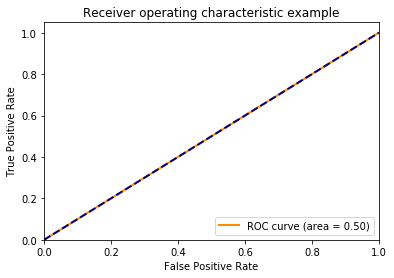

In [53]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


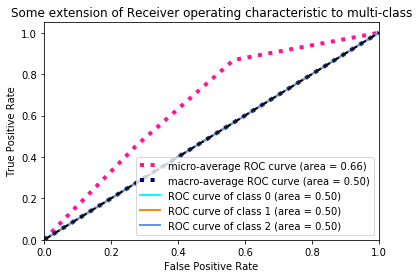

In [54]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()